Optimal Transport with Linear Programming
=========================================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This numerical tours details how to solve the discrete optimal transport
problem (in the case of measures that are sums of Diracs) using linear
programming.

In [1]:
options(repr.plot.width=3.5, repr.plot.height=3.5)
options(warn=-1) # turns off warnings, to turn on: "options(warn=0)"


library(imager)
library(png)

source("nt_toolbox/general.R")
source("nt_toolbox/signal.R")

Loading required package: plyr
Loading required package: magrittr

Attaching package: 'imager'

The following object is masked from 'package:magrittr':

    add

The following object is masked from 'package:plyr':

    liply

The following objects are masked from 'package:stats':

    convolve, spectrum

The following object is masked from 'package:graphics':

    frame

The following object is masked from 'package:base':

    save.image



Optimal Transport of Discrete Distribution
------------------------------------------
We consider two dicretes distributions
$$ \forall k=0,1, \quad \mu_k = \sum_{i=1}^{n_k} p_{k,i} \de_{x_{k,i}} $$
where $n_0,n_1$ are the number of points, $\de_x$ is the Dirac at
location $x \in \RR^d$, and $ X_k = ( x_{k,i} )_{i=1}^{n_k} \subset \RR^d$ for $k=0,1$
are two point clouds.


We define the set of couplings between $\mu_0,\mu_1$ as

$$ \Pp = \enscond{ (\ga_{i,j})_{i,j} \in (\RR^+)^{n_0 \times n_1} }{
     \forall i, \sum_j \ga_{i,j} = p_{0,i}, \:
     \forall j, \sum_i \ga_{i,j} = p_{1,j} } $$


The Kantorovitch formulation of the optimal transport reads

$$ \ga^\star \in \uargmin{\ga \in \Pp} \sum_{i,j} \ga_{i,j} C_{i,j}  $$
where $C_{i,j} \geq 0$ is the cost of moving some mass from $x_{0,i}$
to $x_{1,j}$.


The optimal coupling $\ga^\star$ can be shown to be a sparse matrix
with less than $n_0+n_1-1$ non zero entries. An entry $\ga_{i,j}^\star \neq 0$
should be understood as a link between $x_{0,i}$
and $x_{1,j}$ where an amount of mass equal to $\ga_{i,j}^\star$ is transfered.


In the following, we concentrate on the $L^2$ Wasserstein distance.
$$ C_{i,j}=\norm{x_{0,i}-x_{1,j}}^2. $$


The $L^2$ Wasserstein distance is then defined as
$$ W_2(\mu_0,\mu_1)^2 = \sum_{i,j} \ga_{i,j}^\star C_{i,j}. $$


The coupling constraint
$$
     \forall i, \sum_j \ga_{i,j} = p_{0,i}, \:
     \forall j, \sum_i \ga_{i,j} = p_{1,j}
$$
can be expressed in matrix form as
$$ \Sigma(n_0,n_1) \ga = [p_0;p_1] $$
where $ \Sigma(n_0,n_1) \in \RR^{ (n_0+n_1) \times (n_0 n_1) } $.

In [2]:
library("Matrix")

Rows <- function(n0, n1){ sparseMatrix(rep(1:n0,times=n1), 1:(n0*n1), x=rep(1, n0*n1)) }

Cols <- function(n0, n1){ sparseMatrix(rep(1:n1,each=n0), 1:(n0*n1), x=rep(1, n0*n1)) }

Sigma <- function(n0,n1){ rBind(Rows(n0,n1),Cols(n0,n1)) }

We use a simplex algorithm to compute the optimal transport coupling
$\ga^\star$.

In [3]:
source("nt_toolbox/perform_linprog.R")

maxit <- 1e+4
tol <- 1e-9
otransp <- function(C,p0,p1){ array(perform_linprog(as.matrix(Sigma(length(p0),length(p1))),array(c(p0,p1),c(length(p0)+length(p1),1)),C,maxit,tol),c(n0,n1)) }

Dimensions $n_0, n_1$ of the clouds.

In [4]:
n0 <- 60
n1 <- 80

Compute a first point cloud $X_0$ that is Gaussian, and a second point cloud $X_1$ that is Gaussian mixture.

In [5]:
gauss <- function(q,a,c){ a*array(rnorm(2*q), c(2,q)) + array(rep(c, q), c(length(c),q)) }
X0 <- array(rnorm(2*n0), c(2,n0))*.3
X1 <- cbind(gauss(n1/2,.5,c(0,1.6)),
            cbind(gauss(n1/4,.3,c(-1,-1)),
                  gauss(n1/4,.3,c(1,-1))))

Density weights $p_0, p_1$.

In [6]:
normalize <- function(a){ a/sum(a) }
p0 <- normalize(array(runif(n0), c(n0, 1)))
p1 <- normalize(array(runif(n1), c(n1, 1)))

Shortcut for display.

In [7]:
myplot <- function(x,y,cex,col){ points(x,y, pch=21, cex=(cex*1.5), col="black", bg=col, lwd=2) }

Display the point clouds.
The size of each dot is proportional to its probability density weight.

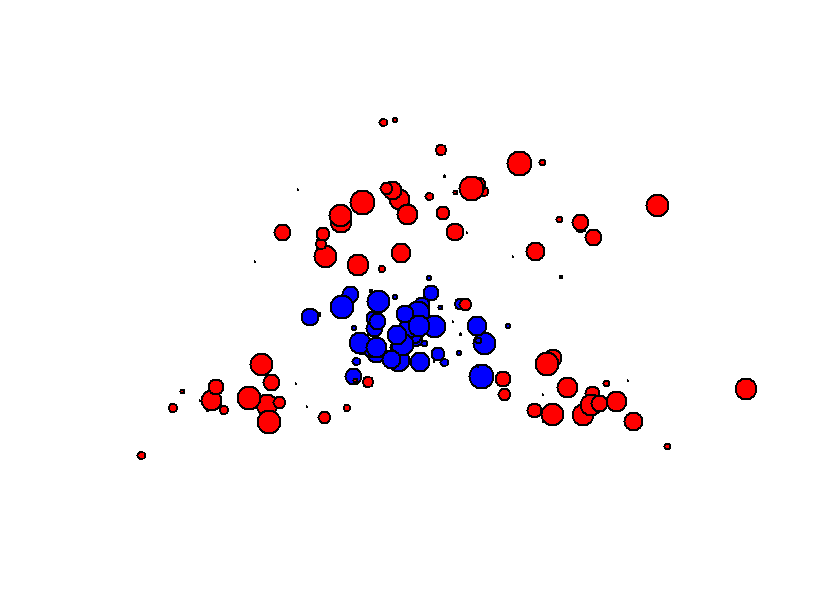

In [8]:
options(repr.plot.width=7, repr.plot.height=5)

plot(1, type="n", axes=F, xlab="", ylab="",
     xlim=c(min(X1[1,])-.1, max(X1[1,])+.1),
     ylim=c(min(X1[2,])-.1, max(X1[2,])+.1))

for (i in 1:length(p0)){
    myplot(X0[1,i], X0[2,i], p0[i]*length(p0), 'blue')
}

for (i in 1:length(p1)){
    myplot(X1[1,i], X1[2,i], p1[i]*length(p1), 'red')
}

Compute the weight matrix $ (C_{i,j})_{i,j}. $

In [9]:
C <- array(rep(apply(X0**2,2,sum),n1), c(n0,n1)) + array(rep(apply(X1**2,2,sum), each=n0), c(n0,n1)) - 2*t(X0)%*%X1

Compute the optimal transport plan.

In [10]:
gamma <- otransp(C, p0, p1)

Check that the number of non-zero entries in $\ga^\star$ is $n_0+n_1-1$.

In [11]:
print(paste("Number of non-zero:", length(gamma[gamma>0]), "(n0 + n1-1 =", n0 + n1-1,")"))

[1] "Number of non-zero: 139 (n0 + n1-1 = 139 )"


Check that the solution satifies the constraints $\ga \in \Cc$.

In [12]:
print(paste("Constraints deviation (should be 0):",
            norm(apply(gamma, 1, sum) - as.vector(p0)),
            norm(apply(gamma, 2, sum) - as.vector(p1)) ))

[1] "Constraints deviation (should be 0): 2.09068366667404e-17 9.23037542831273e-18"


Displacement Interpolation
--------------------------
For any $t \in [0,1]$, one can define a distribution $\mu_t$ such
that $t \mapsto \mu_t$ defines a geodesic for the Wasserstein metric.


Since the $W_2$ distance is a geodesic distance, this geodesic path solves the
following variational problem

$$ \mu_t = \uargmin{\mu} (1-t)W_2(\mu_0,\mu)^2 + t W_2(\mu_1,\mu)^2. $$
This can be understood as a generalization of the usual Euclidean
barycenter to barycenter of distribution. Indeed, in the case that
$\mu_k = \de_{x_k}$, one has $\mu_t=\de_{x_t}$ where $ x_t =
(1-t)x_0+t x_1 $.


Once the optimal coupling $\ga^\star$ has been computed, the
interpolated distribution is obtained as

$$ \mu_t = \sum_{i,j} \ga^\star_{i,j} \de_{(1-t)x_{0,i} + t x_{1,j}}. $$


Find the $i,j$ with non-zero $\ga_{i,j}^\star$.

In [13]:
nonzero <- function(X){
    n_r <- dim(X)[1]
    idx <- which(X != 0)
    I <- mod(idx-1,n_r)+1
    J <- ceiling(idx/n_r)
    return(list(I=I, J=J))
}
nonzero_gamma <- nonzero(gamma)
I <- nonzero_gamma$I ; J <- nonzero_gamma$J

In [14]:
gammaij <- gamma[which(gamma != 0)]

Display the evolution of $\mu_t$ for a varying value of $t \in [0,1]$.

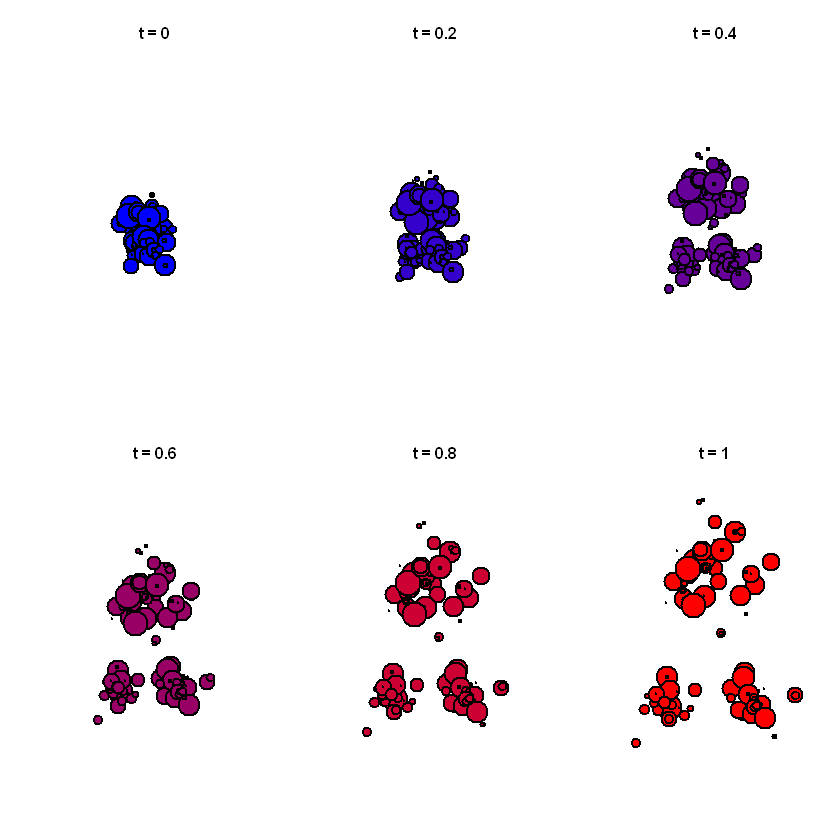

In [15]:
options(repr.plot.width=7, repr.plot.height=7)

tlist = seq(0, 1, length=6)
par(mfrow=c(2,3))

for (i in 1:length(tlist)){
    t <- tlist[i]
    Xt <- (1-t)*X0[,I] + t*X1[,J]
    
    plot(1, type="n", axes=F, xlab="", ylab="", main=paste("t =", t),
     xlim=c(min(X1[1,])-.1, max(X1[1,])+.1),
     ylim=c(min(X1[2,])-.1, max(X1[2,])+.1))
    
    for (j in 1:length(gammaij)){
        myplot(Xt[1,j],Xt[2,j],gammaij[j]*length(gammaij),rgb(t,0,1-t))
    }
        
}

Optimal Assignement
-------------------
In the case where the weights $p_{0,i}=1/n, p_{1,i}=1/n$ (where $n_0=n_1=n$) are
constants, one can show that the optimal transport coupling is actually a
permutation matrix. This properties comes from the fact that
the extremal point of the polytope $\Cc$ are permutation matrices.


This means that there exists an optimal permutation $ \si^\star \in \Sigma_n $ such
that

$$ \ga^\star_{i,j} = \choice{
      1 \qifq j=\si^\star(i), \\
      0 \quad\text{otherwise}.
  } $$
  
where $\Si_n$ is the set of permutation (bijections) of
$\{1,\ldots,n\}$.


This permutation thus solves the so-called optimal assignement problem

$$ \si^\star \in \uargmin{\si \in \Sigma_n}
      \sum_{i} C_{i,\si(j)}. $$


Same number of points.

In [16]:
n0 <- 40
n1 <- n0

Compute points clouds.

In [17]:
X0 <- array(rnorm(2*n0), c(2,n0))*.3
X1 <- cbind(gauss(n1/2,.5,c(0,1.6)),
            cbind(gauss(n1/4,.3,c(-1,-1)),
                  gauss(n1/4,.3,c(1,-1))))

Constant distributions.

In [18]:
p0 <- array(1, c(n0,1))/n0
p1 <- array(1, c(n1,1))/n1

Compute the weight matrix $ (C_{i,j})_{i,j}. $

In [19]:
C <- array(rep(apply(X0**2,2,sum),n1), c(n0,n1)) + array(rep(apply(X1**2,2,sum), each=n0), c(n0,n1)) - 2*t(X0)%*%X1

Display the coulds.

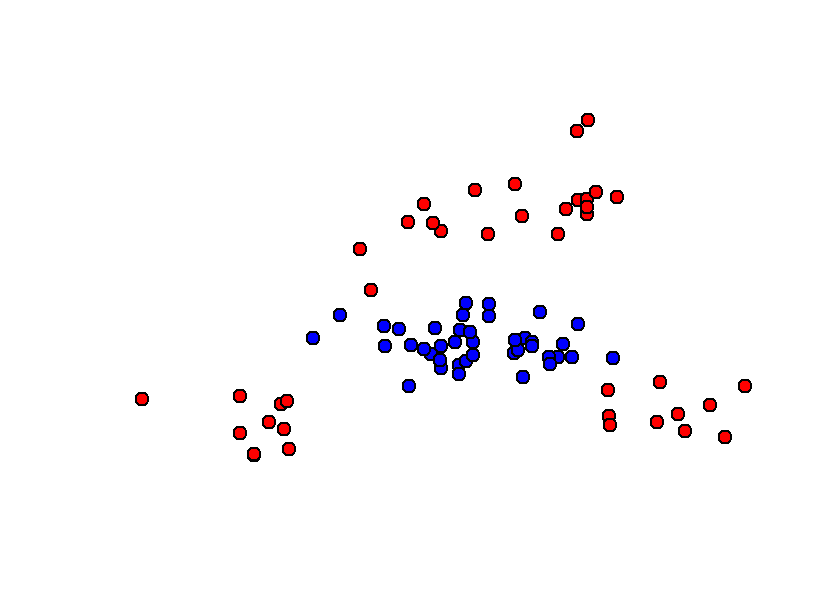

In [20]:
options(repr.plot.width=7, repr.plot.height=5)

plot(1, type="n", axes=F, xlab="", ylab="",
     xlim=c(min(X1[1,])-.1, max(X1[1,])+.1),
     ylim=c(min(X1[2,])-.1, max(X1[2,])+.1))

myplot(X0[1,],X0[2,],1,"blue")
myplot(X1[1,],X1[2,],1,"red")

Solve the optimal transport.

In [21]:
source("nt_toolbox/perform_linprog.R")

gamma <- otransp(C, p0, p1)

Show that $\ga$ is a binary permutation matrix.

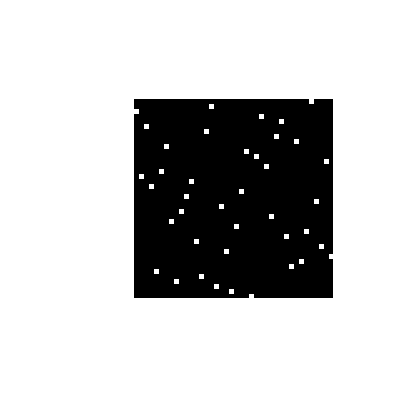

In [22]:
options(repr.plot.width=3.5, repr.plot.height=3.5)

imageplot(gamma)

Display the optimal assignement.

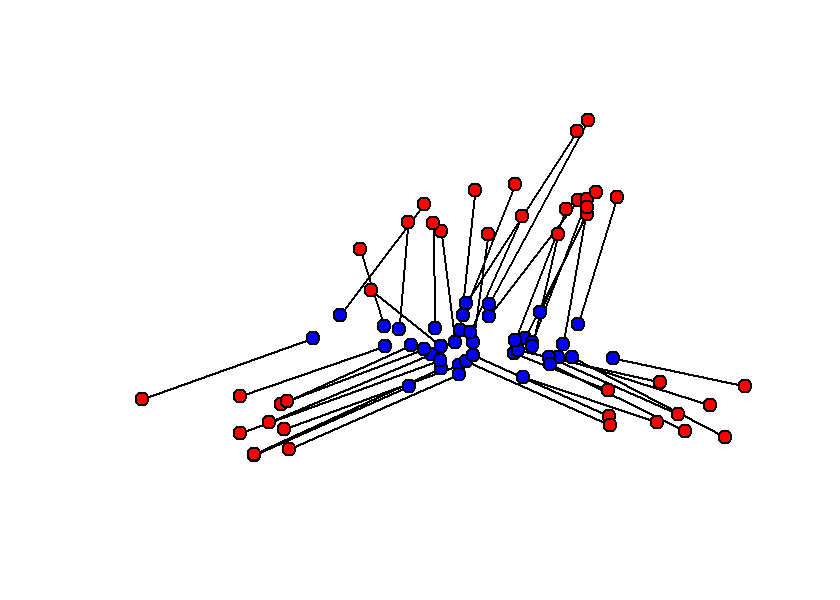

In [23]:
nonzero_gamma <- nonzero(gamma)
I <- nonzero_gamma$I ; J <- nonzero_gamma$J

options(repr.plot.width=7, repr.plot.height=5)

plot(1, type="n", axes=F, xlab="", ylab="",
     xlim=c(min(X1[1,])-.1, max(X1[1,])+.1),
     ylim=c(min(X1[2,])-.1, max(X1[2,])+.1))

for (k in 1:length(I)){
    lines(c(X0[1,I[k]], X1[1,J[k]]),
          c(X0[2,I[k]], X1[2,J[k]]),
          lwd=2)
}

myplot(X0[1,],X0[2,],1,"blue")
myplot(X1[1,],X1[2,],1,"red")